In [1]:
from google.colab import files

In [2]:
files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


{'EastWestAirlines.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00$)\xe6]\x89\x01\x00\x00!\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,k_means,DBSCAN
from sklearn.metrics import *

In [4]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.sample(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1225,1238,106234,5124,2,1,1,11160,26,0,0,5238,0
768,778,10978,0,3,1,1,14313,11,0,0,6193,1
1715,1731,13046,0,1,1,1,0,0,0,0,4597,1


In [5]:
data.drop(['ID#','Award?'],axis=1,inplace=True)


In [6]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [7]:
data.isna().sum().sum()

0

In [10]:
scaler=StandardScaler()
std_data=scaler.fit_transform(data)

In [23]:
std_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [11]:
#Applying PCA
pca=PCA(random_state=10,n_components=0.95)
pca_data=pca.fit_transform(std_data)

In [26]:
pca_data

array([[-1.30259849, -0.06672133, -0.83747912, ...,  1.29486574,
        -0.63453959,  0.31684132],
       [-1.28625898, -0.06339178, -0.7842588 , ...,  1.24935537,
        -0.72120272,  0.24497869],
       [-1.0325221 , -0.13688067, -0.81075855, ...,  1.25188529,
        -0.59444208,  0.12847069],
       ...,
       [-0.23455655, -0.57857909,  0.55814645, ..., -1.01381263,
         0.65211943,  0.49091492],
       [-1.52141921,  0.72682723,  0.39141878, ..., -0.33635817,
         0.79154696,  0.41323792],
       [-1.96207193,  0.40994447,  0.49043906, ..., -0.47367864,
         0.41666697,  0.43238182]])

In [12]:
print(pca.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [13]:
print(pca.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [21]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [25]:
model1=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
cluster_model1=model1.fit_predict(pca_data)
cluster_model1

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
nc=range(2,10)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i)
  cluster_numbers=model.fit_predict(std_data)
  l.append(silhouette_score(std_data,cluster_numbers))

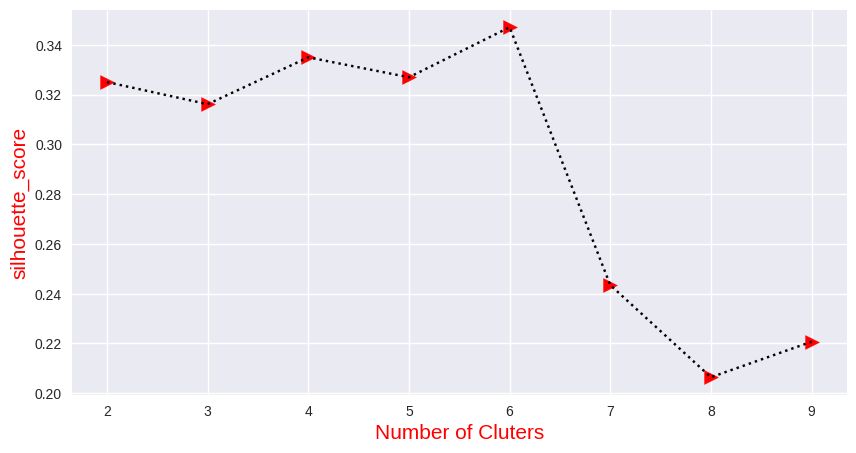

In [28]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l,linestyle=":",color="black")
plt.scatter(nc,l,s=100,marker='>',color="red")
plt.xlabel("Number of Cluters",size=15, color="red")
plt.ylabel("silhouette_score",size=15, color="red")
plt.show()

In [30]:
#Kmenas
model2=KMeans(n_clusters=5)
cluster_numbers=model2.fit_predict(std_data)
cluster_numbers

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [32]:
nc=range(2,10)
l1=[]
for i in nc:
  model=KMeans(n_clusters=i)
  cluster_numbers=model.fit_predict(std_data)
  l1.append(model.inertia_)

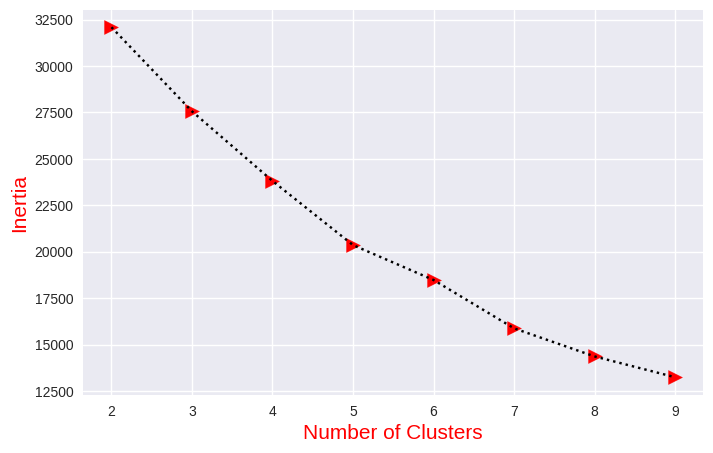

In [33]:
plt.figure(figsize=(8,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l1,linestyle=":",color="black")
plt.scatter(nc,l1,s=100,marker=">",color="red")
plt.xticks(nc)
plt.xlabel("Number of Clusters",size=15, color="red")
plt.ylabel("Inertia",size=15, color="red")
plt.show()

In [35]:
#DBSCAN
std_scaler=StandardScaler()
std_norm=std_scaler.fit_transform(data)

In [36]:
model_DBSCAN=DBSCAN(min_samples=4,eps=1)
cluster_numbers2=model_DBSCAN.fit_predict(std_norm)
data['cluster_numbers2']=cluster_numbers2

In [37]:
data.sample(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_numbers2
2595,91296,0,3,1,1,19057,16,0,0,2712,0
226,117329,0,1,2,1,6448,11,0,0,7416,1
3910,6822,0,1,1,1,0,0,0,0,1559,0


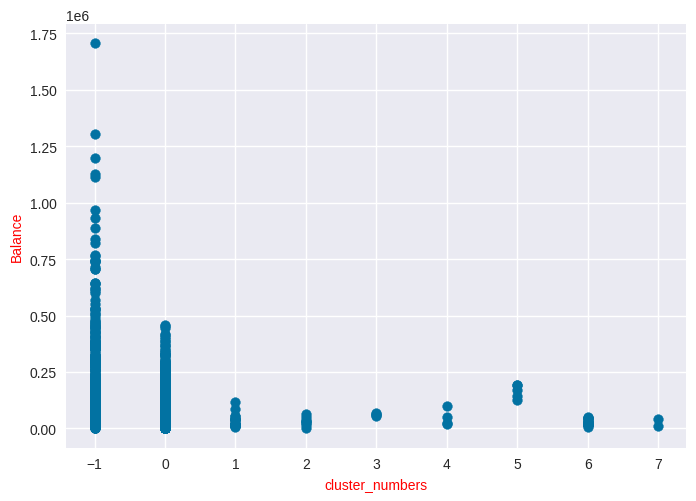

In [53]:
plt.scatter(data["cluster_numbers2"],data['Balance'])
plt.xlabel("cluster_numbers",size=10,color="red")
plt.ylabel("Balance",size=10,color="red")
plt.show()

In [ ]:
#Inference:
# According to Kmeans the clusters numbers are 6 since the bend has occured at 6th cluster in Elbow plot
# and as per shilhoutee score culsters numbers are 6 for Hirarchichal analsis